In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from shutil import copy

In [2]:
differences = pd.read_csv('data/differences.csv')

In [3]:
differences

,Name,Frechet distance,Curve length measure
0,lap1-0.csv,0.000055,0.000130
1,lap1-1.csv,0.000055,0.000075
2,lap1-10.csv,0.000052,0.000072
3,lap1-11.csv,0.000053,0.000063
4,lap1-12.csv,0.000062,0.000083
5,lap1-13.csv,0.001480,0.000388
6,lap1-14.csv,0.001495,0.000544
7,lap1-15.csv,0.000064,0.000078
8,lap1-16.csv,0.000056,0.000061
9,lap1-17.csv,0.000052,0.000060


<AxesSubplot:xlabel='Frechet distance', ylabel='Curve length measure'>

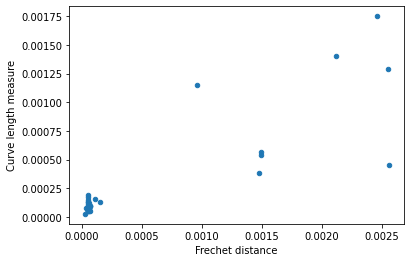

In [4]:
differences.plot.scatter(x='Frechet distance', y='Curve length measure')

In [5]:
differences[(differences['Frechet distance'] > 0.0018) | (differences['Curve length measure'] > 0.00075)]

,Name,Frechet distance,Curve length measure
40,lap2-14.csv,0.002462,0.001749
41,lap2-15.csv,0.000957,0.001146
42,lap2-16.csv,0.002553,0.001293
54,lap3-3.csv,0.002120,0.001402
55,lap3-4.csv,0.002558,0.000455


In [6]:
differences[(differences['Frechet distance'] > 0.001) & (differences['Frechet distance'] < 0.002)]

,Name,Frechet distance,Curve length measure
5,lap1-13.csv,0.001480,0.000388
6,lap1-14.csv,0.001495,0.000544
27,lap1-33.csv,0.001491,0.000569


According to the graph, I would define two bounds for determing whether lap was unsuccessful. Frechet distance = **0.0010** and Curve length measure = **0.00025**.

In [7]:
totally_wrong_diff = differences[(differences['Frechet distance'] > 0.001) | (differences['Curve length measure'] > 0.00025)]
clean_diff = differences[(differences['Frechet distance'] < 0.001) & (differences['Curve length measure'] < 0.00025)]
clean_diff

,Name,Frechet distance,Curve length measure
0,lap1-0.csv,0.000055,0.000130
1,lap1-1.csv,0.000055,0.000075
2,lap1-10.csv,0.000052,0.000072
3,lap1-11.csv,0.000053,0.000063
4,lap1-12.csv,0.000062,0.000083
7,lap1-15.csv,0.000064,0.000078
8,lap1-16.csv,0.000056,0.000061
9,lap1-17.csv,0.000052,0.000060
10,lap1-18.csv,0.000054,0.000073
11,lap1-19.csv,0.000053,0.000062


<AxesSubplot:xlabel='Frechet distance', ylabel='Curve length measure'>

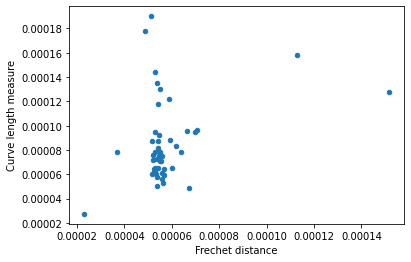

In [8]:
clean_diff.plot.scatter(x='Frechet distance', y='Curve length measure')

In [9]:
semi_wrong_diff = clean_diff[(clean_diff['Frechet distance']>0.00008) | (clean_diff['Curve length measure']>0.00015)]
semi_wrong_diff

,Name,Frechet distance,Curve length measure
12,lap1-2.csv,0.000051,0.000190
26,lap1-32.csv,0.000152,0.000128
46,lap2-5.csv,0.000049,0.000178
52,lap3-1.csv,0.000113,0.000158


In [10]:
clean_diff = clean_diff[(clean_diff['Frechet distance'] < 0.00008) & (clean_diff['Curve length measure'] < 0.00015)]
clean_diff

,Name,Frechet distance,Curve length measure
0,lap1-0.csv,0.000055,0.000130
1,lap1-1.csv,0.000055,0.000075
2,lap1-10.csv,0.000052,0.000072
3,lap1-11.csv,0.000053,0.000063
4,lap1-12.csv,0.000062,0.000083
7,lap1-15.csv,0.000064,0.000078
8,lap1-16.csv,0.000056,0.000061
9,lap1-17.csv,0.000052,0.000060
10,lap1-18.csv,0.000054,0.000073
11,lap1-19.csv,0.000053,0.000062


Bounds **0.00008** for Frechet distance and 0.00015 for Curve length measure may identify that there are some wrong measurements, but it is a rule.
Manual check is needed. 

In this case, only lap3-1.csv has strange measurements.

In [11]:
laps_dir = 'data/laps'
for fileName in listdir(laps_dir):
    lap_dir = '{}/{}'.format(laps_dir, fileName)
    if fileName in clean_diff.Name.values:
        copy(lap_dir, 'data/laps_clean')
    elif fileName in semi_wrong_diff.Name.values:
        copy(lap_dir, 'data/laps_semi_wrong')
    else:
        copy(lap_dir, 'data/laps_wrong')